<a href="https://colab.research.google.com/github/martinwilloch/Serverless-Course/blob/main/visma_serverless_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Visma Interactive Course: Implement and deploy a Serverless application in AWS 

### Introduction

In this course you will learn how to set up a back-end application using serverless technology in AWS. Using this notebook you can work alongside us simultaneously, and get hands-on experience. 

If you get stuck, let us know in the chat, and one of our instructors will get in touch to assist you in resolving it.

We will be using Colab Notebooks. Each code cell can contain Python code. To run shell (like in a terminal) start ! at the beginning of the cell.



### Installing prerequisites

First, we need to install the prerequisites for the course. Read the text before running each cell.
 
To begin with, we install the Serverless framework.

In [ ]:
!npm install -g serverless 2>/dev/null

Next, we need to download the command line interface for AWS, i.e. the awscli. Use the following commands to download it, unzip it and install it.

In [ ]:
!curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
!unzip awscliv2.zip 1>/dev/null
!sudo ./aws/install &>/dev/null
!./aws/install -i /usr/local/aws-cli -b /usr/local/bin &>/dev/null

You can verify that awscli installed correctly by checking the version. If there is no error, the awscli was successfully installed.

In [ ]:
!aws --version

Now we will configure the aws settings. First go back to the AWS console and do the following:
IAM → Users → Create a user called “serverless-course-user” with programmatic access→ Create a group with “AdministratorAccess” and call it “serverless-course-group”→ Skip tags → Review and create user → Save the aws-generated credentials on your local machine in the ~/.aws/credentials file with the following format:


1.   IAM
2.   Users
3.   Create a user called "serverless-course-user"
4.   Create a groip with "AdministratorAccess" and call it "serverless-course-group"
5. Skip tags
6. Review and create user
7. Note the access ID and secret key


Run the command below to configure aws. Enter your access ID and secret key. For region, write "eu-west-1". Press enter to set default output format to "None".



In [ ]:
!aws configure

### Deploying a simple application with Infrastructure as Code

Now we are all set to start writing Infrastructure as Code, as well as our back-end code. Specificially, we will work with two files:

*   serverless.yml: This file contains the instructions we pass on to Serverless, such that it know what resources to create in AWS.
*   handler.py: This file contains the back-end logic for what happens when send a request to an endpoint.

Proceed with each section below.

#### Setting up the infrastructure

In this section we will write instructions to the Serverless framework on what resources it should create on AWS. First, we need to create a serverless.yml file. Do that by opening the folders on the right (see picture below) and right-click "New file". It is important that the file is named *serverless.yml*

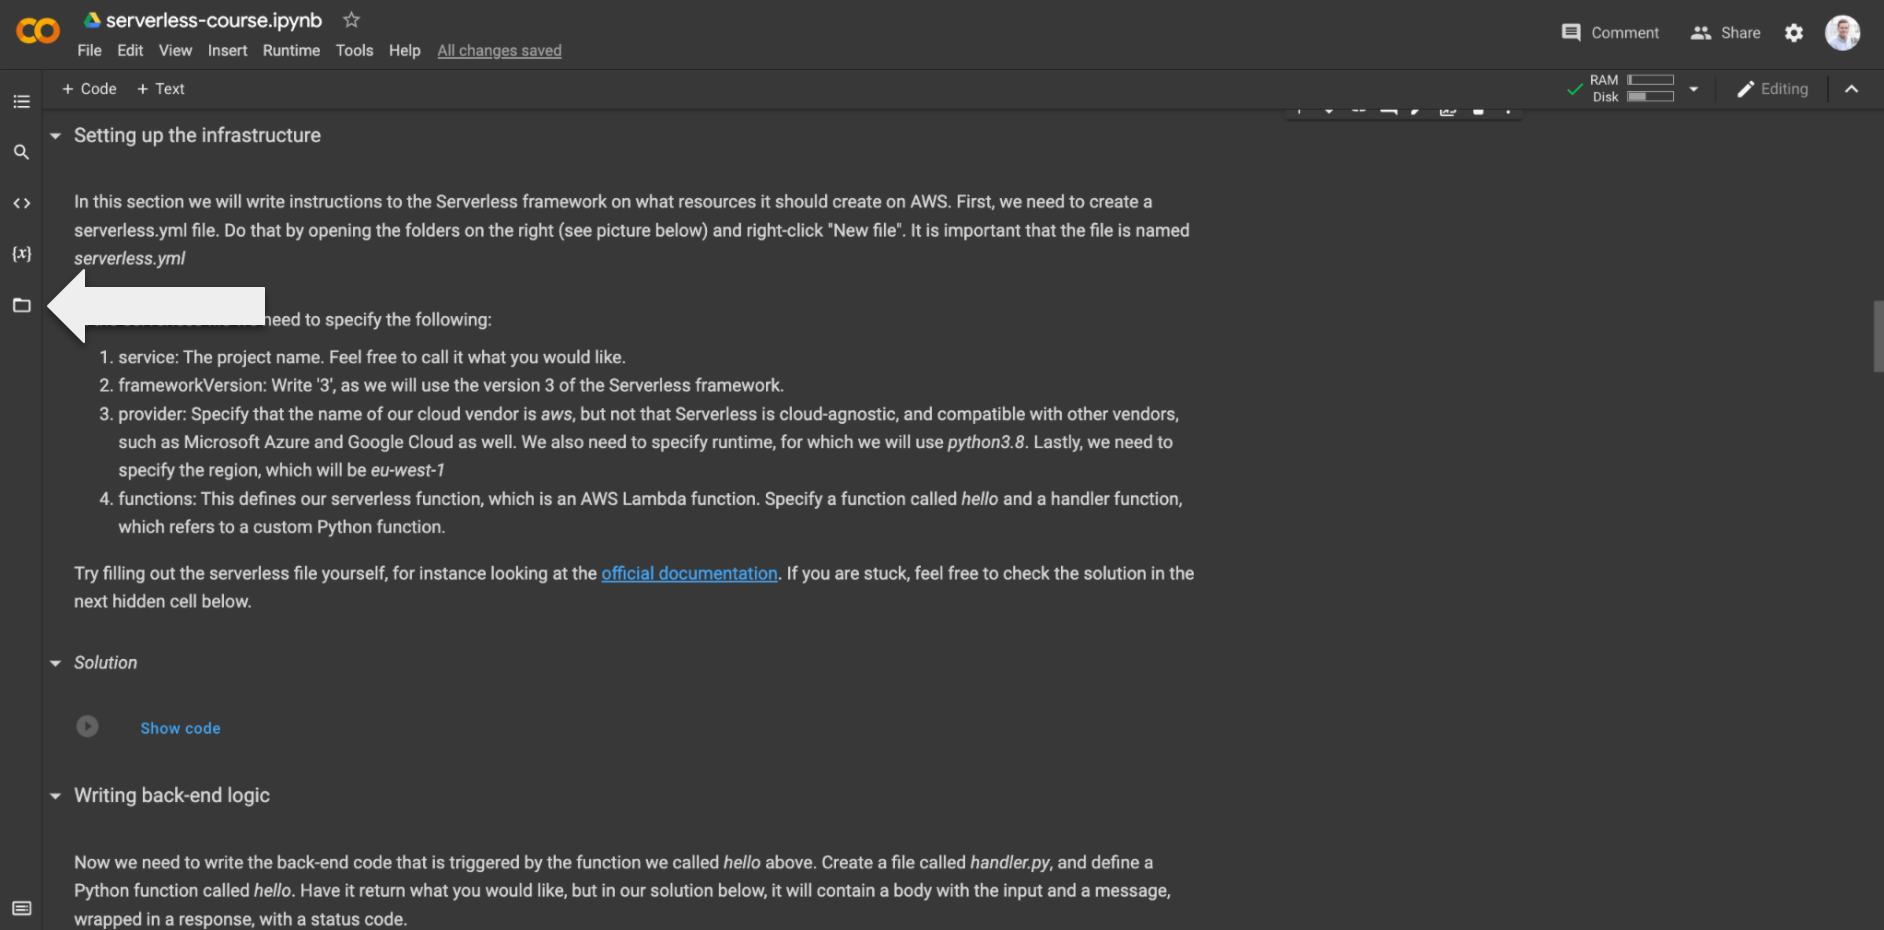

In the serverless file we need to specify the following:

1.   service: The project name. Feel free to call it what you would like.
2.   frameworkVersion: Write '3', as we will use the version 3 of the Serverless framework. 
3.   provider: Specify that the name of our cloud vendor is *aws*, but note that Serverless is cloud-agnostic, and compatible with other vendors, such as Microsoft Azure and Google Cloud as well. We also need to specify runtime, for which we will use *python3.8*. Lastly, we need to specify the region, which will be *eu-west-1*
4.   functions: This defines our serverless function, which is an AWS Lambda function. Specify a function called *hello* and a handler function, which refers to a custom Python function.

Try filling out the serverless file yourself, for instance looking at the [official documentation](https://docs.serverless.com). If you are stuck, feel free to check the solution in the next hidden cell below.

###### *Solution*

In [ ]:
#@title
service: visma-serverless-course

provider:
  name: aws
  runtime: python3.8
  region: eu-west-1

frameworkVersion: '3'

functions:
  hello:
    handler: handler.hello

#### Writing back-end logic





Now we need to write the back-end code that is triggered by the function we called *hello* above. Create a file called *handler.py*, and define a Python function called *hello*. Have it take as input *event* and *context*, and have it return what you would like, but in our solution below, it will contain a body with the input and a message, wrapped in a response, with a status code.

Do not write any sensitive information in the function, as the response will be public.

###### *Solution*

In [ ]:
#@title
import json


def hello(event, context):
    body = {
        "message": "Go Serverless v1.0! Your function executed successfully!",
        "input": event
    }

    response = {
        "statusCode": 200,
        "body": json.dumps(body)
    }

    return response

#### Create function event

We now have a serverless function that executes the back-end logic, but we have yet to attach an event triggering the back-end logic. To do that, we need to add *events* to the *hello* function in the serverless file. The type of event should be *http*, meaning HTTP requests may trigger the function. The HTTP event must have a path, which we will call */call* and a method, that will be GET, because we will be retrieving a static resource. Since we select HTTP, Serverless will create an API that we can trigger the resources through, by making requests to the generated API endpoints.

Implement the triggering event. If you get stuck, feel free to ask questions or check the solution below.

###### *Solution*

In [ ]:
#@title
service: visma-serverless-course

frameworkVersion: '3'

provider:
  name: aws
  runtime: python3.
  region: eu-west-1

functions:
  hello:
    handler: handler.hello
    events:
      - http:
          path: /hello
          method: get

#### Deploying the application

We now have our cloud resource instructions in the serverless file, our back-end login in the handler file and an event that triggers the function. It is time to deploy our simple application to the cloud!

Deploying using the Serverless framework is straightforward, as long as we follow the naming conventions. Execute the command below, to deploy the function to AWS. Expect it to take a few minutes.

In [ ]:
!serverless deploy --aws-profile default

#### Testing the application

If the command executed correctly, there should be an URL at the end of the output. Copy the URL and paste it into your Postman client. Remember to set the method to GET. It should look similar to the image below.

Send the request, and if you get back the same as you should return in your *hello* function in the *handler.py* file, then the application works.

Congratulations, you have deployed your first cloud application!

What is happening is that your request is sent to an AWS server, that triggers the back-end logic you wrote in this course, and the back-end code is executed on an AWS server, before returning the response back to you.

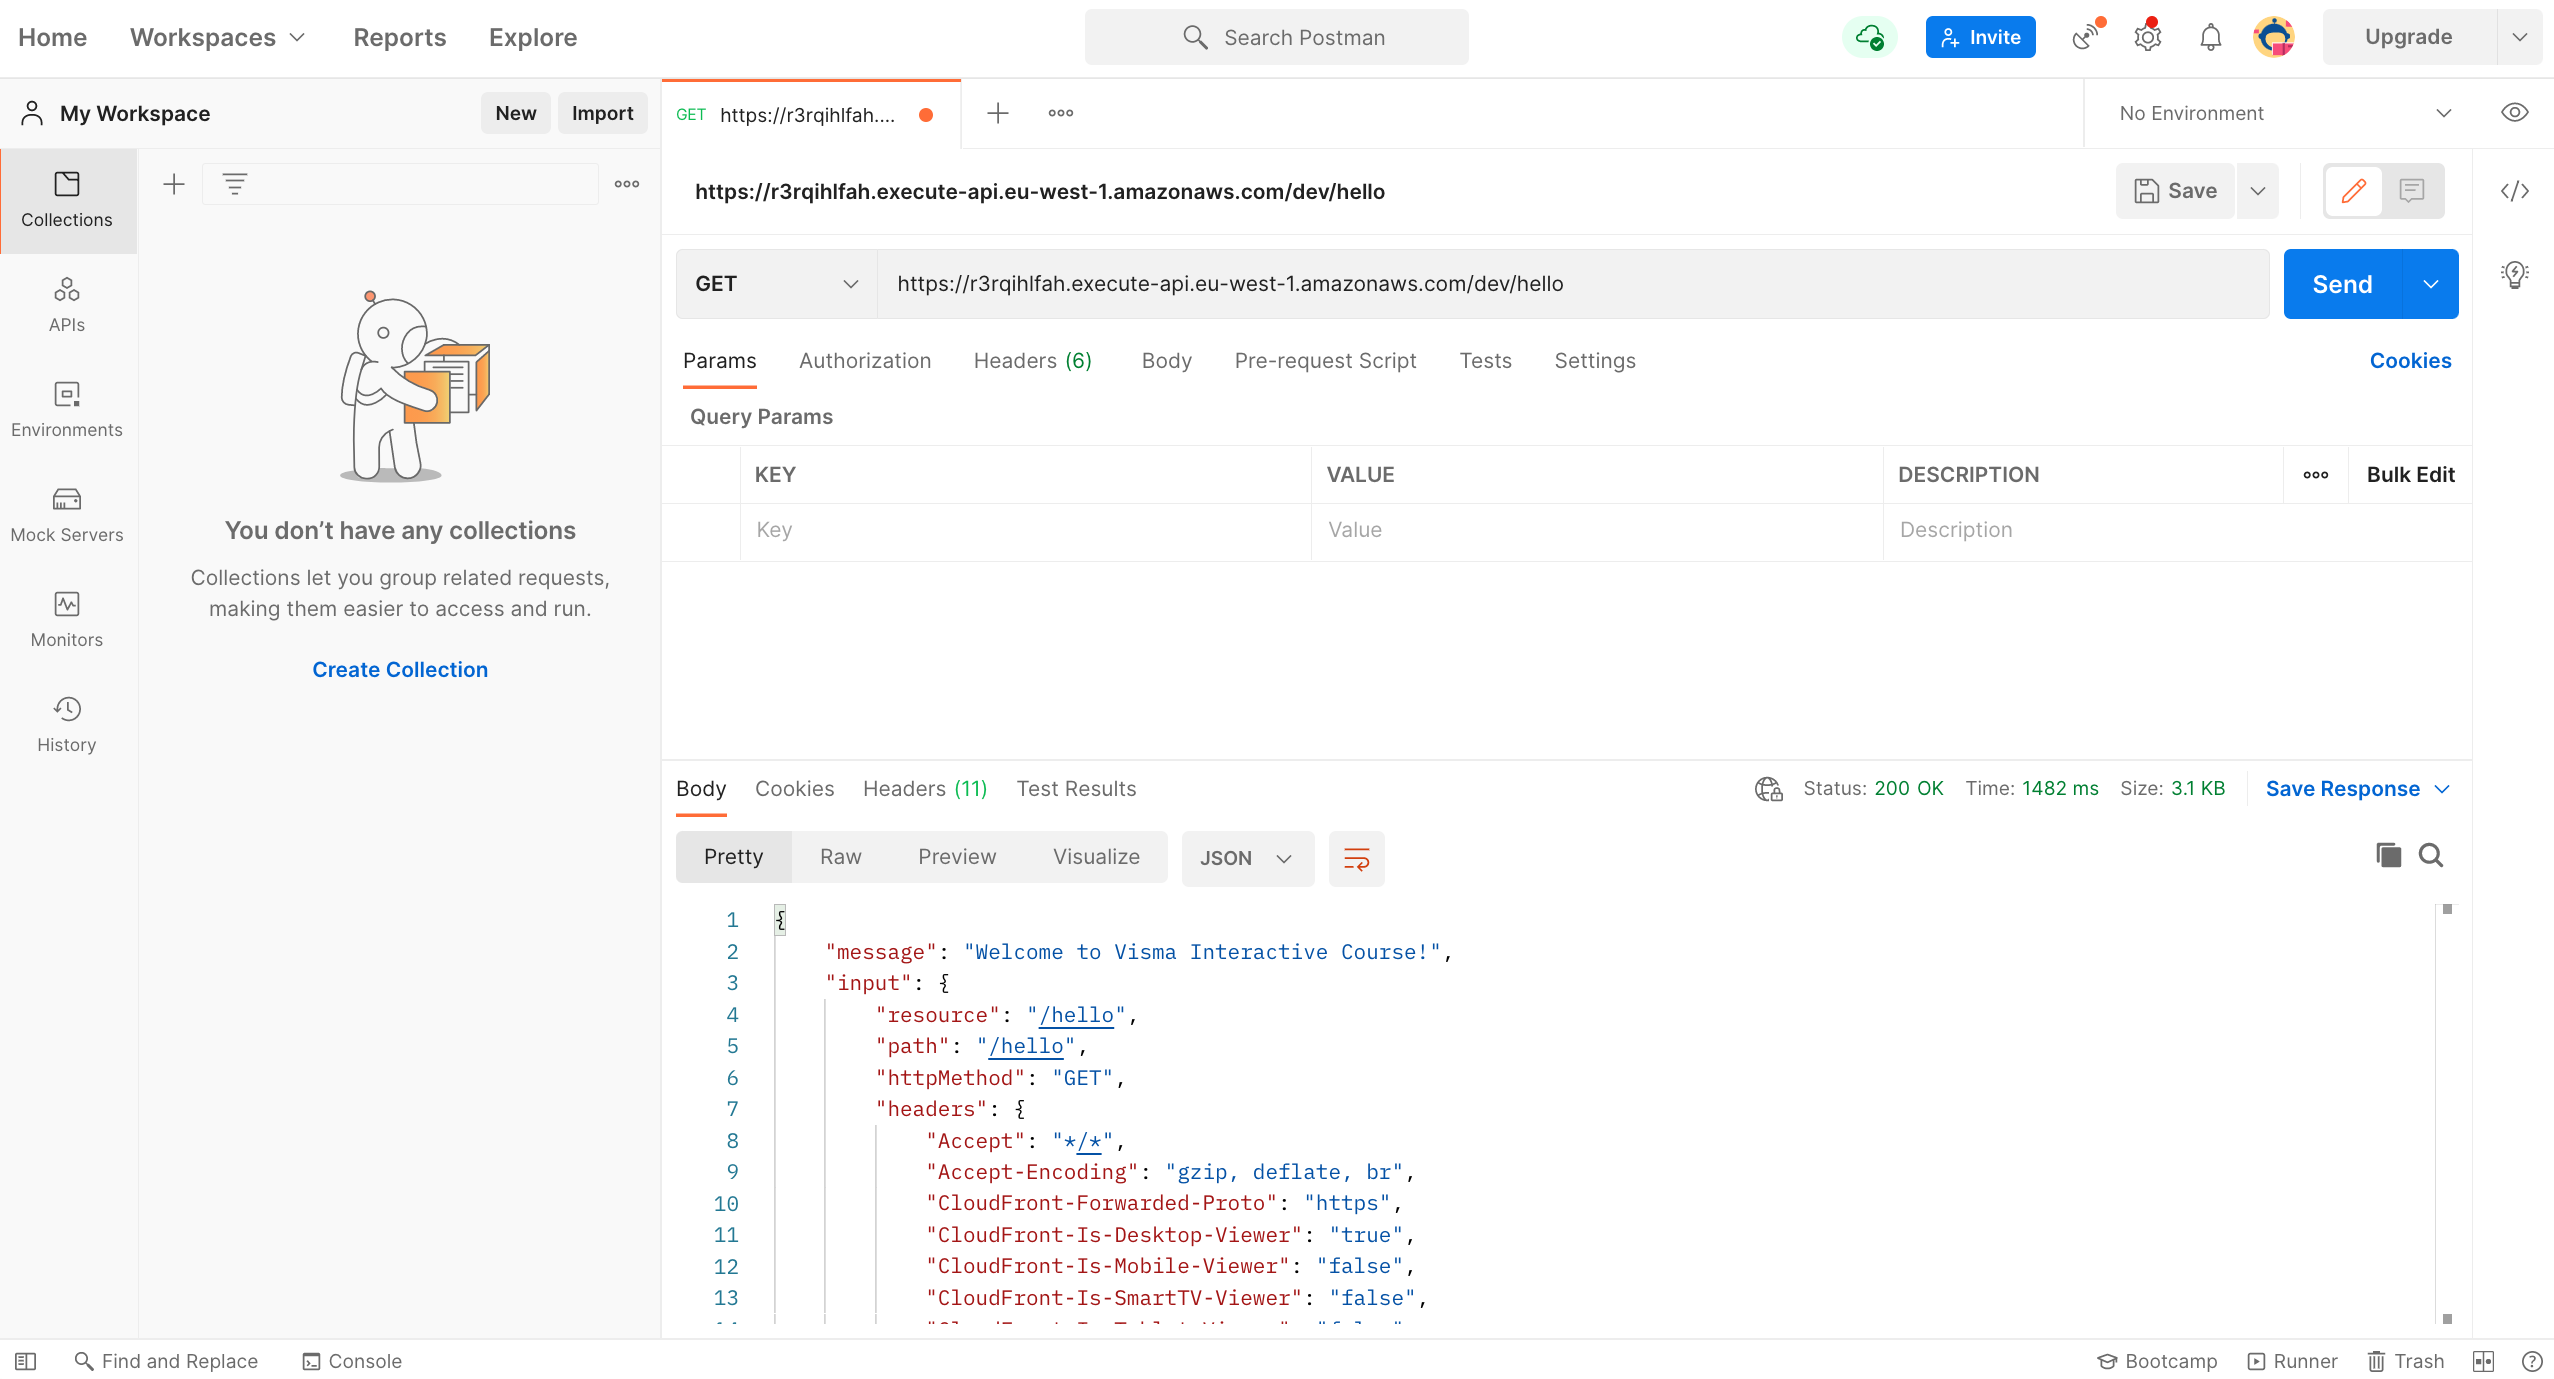

### Enhancing the application

Great job! Now, let's make the application a bit more advanced. First, we will add a security layer to our application. Next, we will make the back-end logic more advanced. 

#### Securing our application

With the current configuration, anyone can trigger your API endpoint. Let us change that by adding API keys as a security feature. 

Although not the most sophisticated mode of authentication, API keys are fast and simple to implement. They are great to begin with, but if you are building more complex applications, especially those containing sensitive data, do consider changing to more advanced methods like OAuth.

To add API keys, we need to configure *apiGateway* in the *provider* part of the serverless file. We need to set the *apiKeys* element, and create an API key with an arbitrary name. We also need to set the trigger event to private.

Give it a shot, and check the solution below if you are stuck.

###### *Solution*

In [ ]:
#@title
service: visma-serverless-course

frameworkVersion: '3'

provider:
  name: aws
  runtime: python3.8
  region: eu-west-1
  versionFunctions: false
  apiGateway:
    apiKeys:
      - apiKey

functions:
  hello:
    handler: handler.hello
    events:
      - http:
          path: /hello
          method: get
          private: true

To test the application security, we first need to redeploy our service to make sure our Infrastructure as Code is actually built by AWS. To do that, run the command in the next cell. Expect it to take a few minutes.

In [ ]:
!serverless deploy --aws-profile default

In addition to the URL, an API key should also be in the output. Copy this, we will use it soon.

First, check that you no longer can reach the API. Go to Postman and send a request like before. Confirm that the request fails, and that your API returns *Forbidden*. To see what to expect in Postman, see the image below.

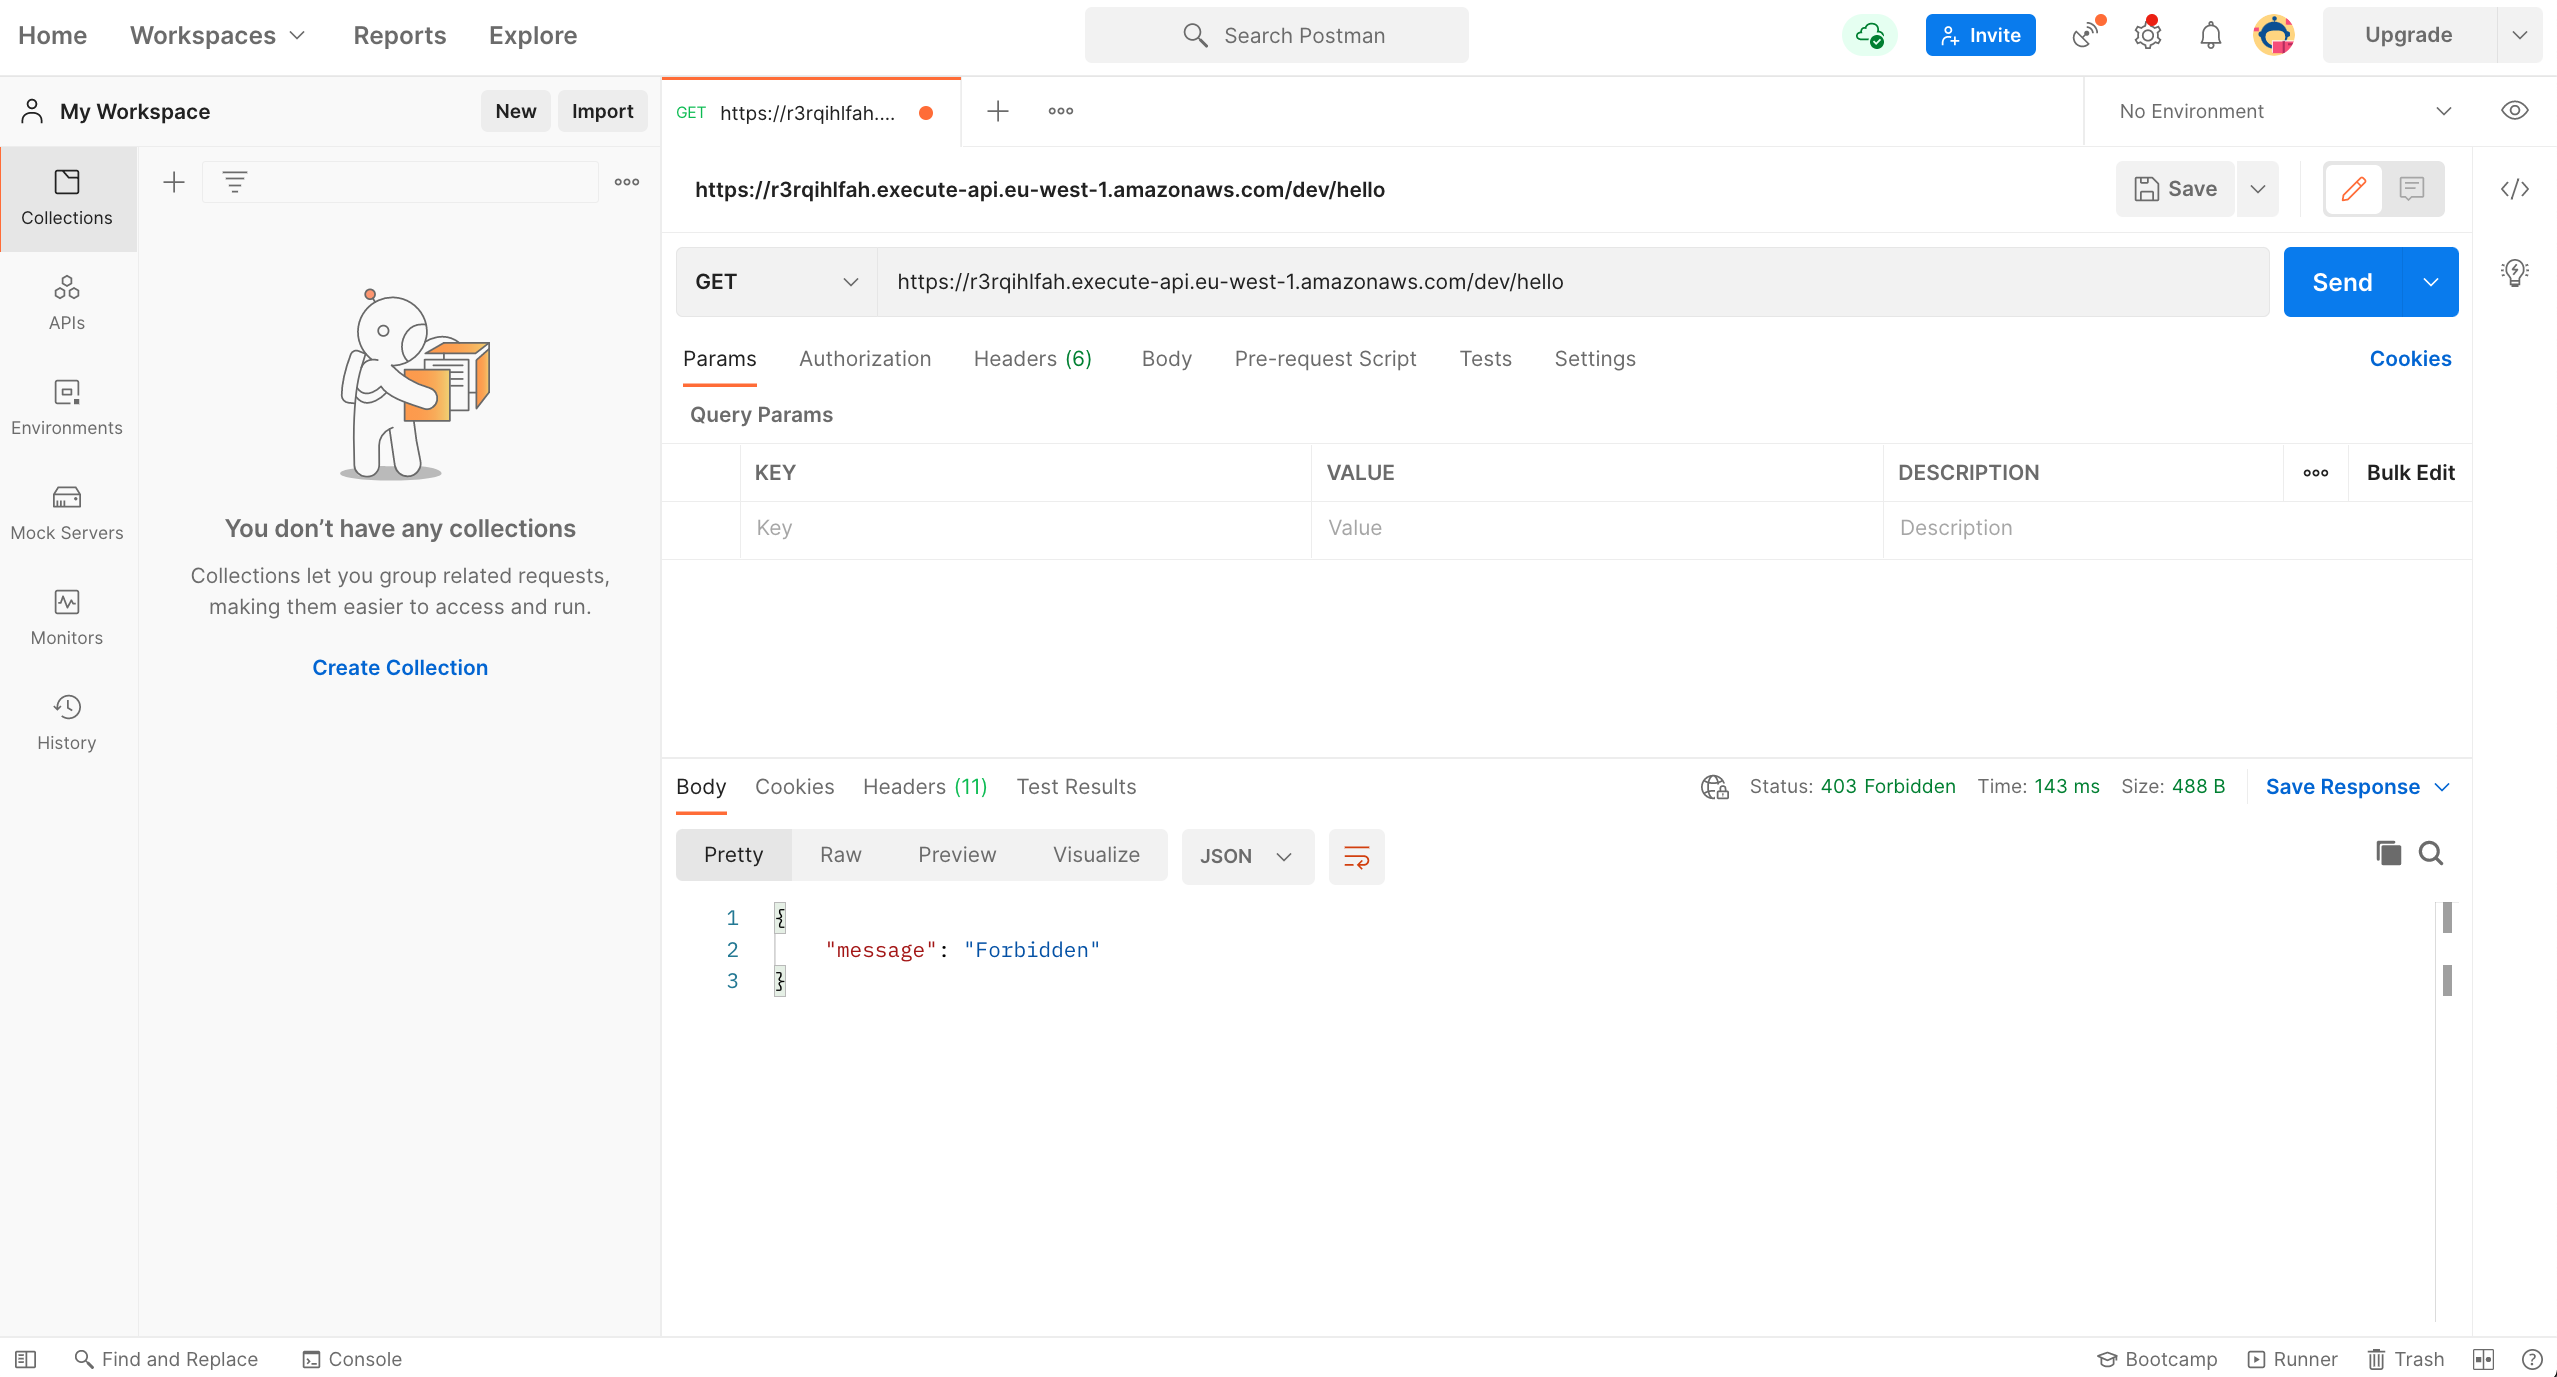

Now, copy the API key from the redeployment output. Open the *Headers* bar in Postman, add a new row where the key is *x-api-key*. Paste your API key in the value field. See the image below to see what it should look like.

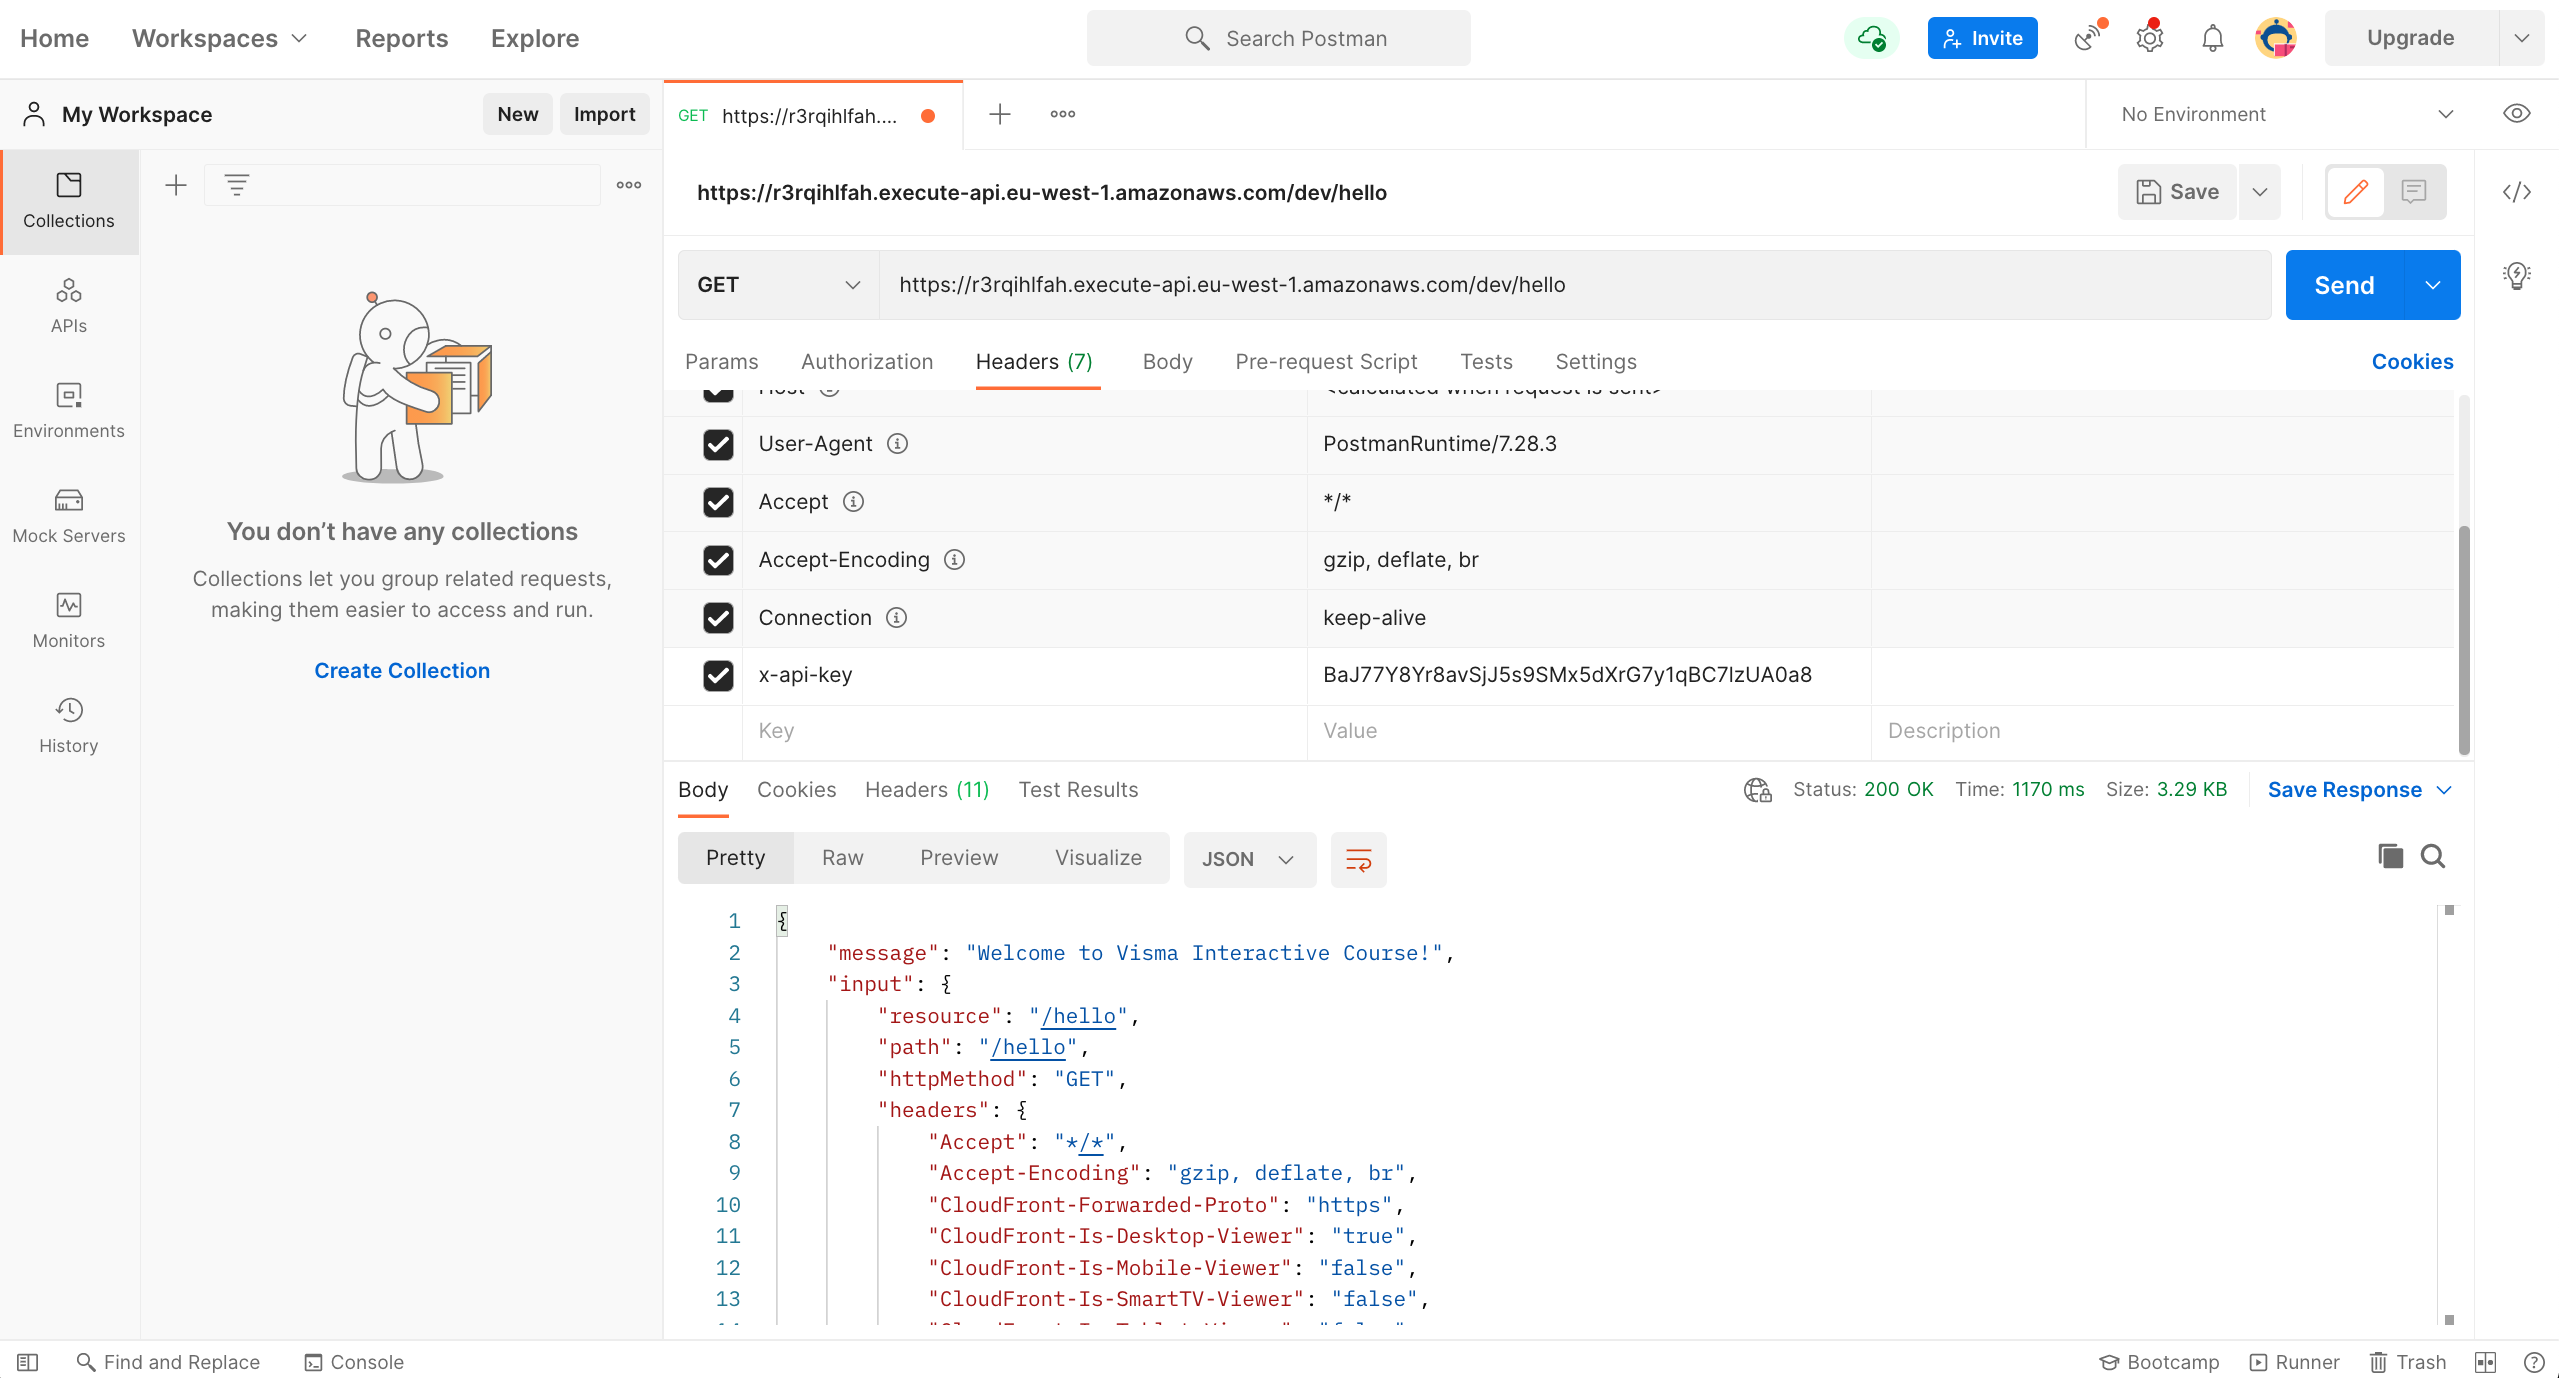

Send the request again. This time, it should pass. Congratulations, you have secured your API!

#### Calculator endpoint

Although our API is secured, the back-end functionality is still simple. Let's enhance it by introducing a new function that can take input and do some operation on it.

First, we include a new Lambda function in the serverless file. Under functions, add a new function called *calculate*. Just like the previous one, it should be triggered by an HTTP event, but with another path, for instance */calculate*, and since we are sending data to create a new resource, we should use the method *POST*. 

Add the functionality to the serverless file. Check the solution below if you want to confirm you got it right.

###### *Solution*

In [ ]:
#@title
service: visma-serverless-course

frameworkVersion: '3'

provider:
  name: aws
  runtime: python3.8
  region: eu-west-1
  versionFunctions: false
  apiGateway:
    apiKeys:
      - apiKey

functions:
  hello:
    handler: handler.hello
    events:
      - http:
          path: /hello
          method: get
          private: true
  calculate:
    handler: handler.calculate
    events:
      - http:
        path: /calculate
        method: post
        private: true


In our new Lambda function, we referred to a new handler function *calculate*. For it to execute any code, we need to write the *calculate* function we referred to. Open the *handler* Python file and define a new function *calculate* with input *event* and *context*. Assume that the input consists of two numbers, *number1* and *number2*, and that you can refer to those numbers using a Python dictionary.

Retrieve the numbers from the event and perform some kind of operation on them, before returning them, again in a body, in addition to a status code.

In our solution example, we have added the two numbers. Feel free to take a look.

###### *Solution*

In [ ]:
#@title
def calculate(event, context):
  input_ = json.loads(event["body"])
  number1 = input_["number1"]
  number2 = input_["number2"]

  result = number1 + number2

  body = {
    'result': result
  }

  response = {
    'statusCode': 200,
    'body': json.dumps(body)
  }

  return response

With both the infrastructure and back-end added, we are ready to deploy our new endpoint. Just like before, run the below command.

In [ ]:
!serverless deploy --aws-profile default

Let us test the new endpoint in Postman. Change your request to a POST one, go to the *Body* bar and select *raw* and then choose *JSON* in the dropdown menu to the right. 

In the body field in Postman, write an input payload. You can also copy-paste the example payload in the cell below.



```
{
  "number1": 10,
  "number2": 32
}
```



You can compare with the image below to see if you have made the right configurations in Postman.

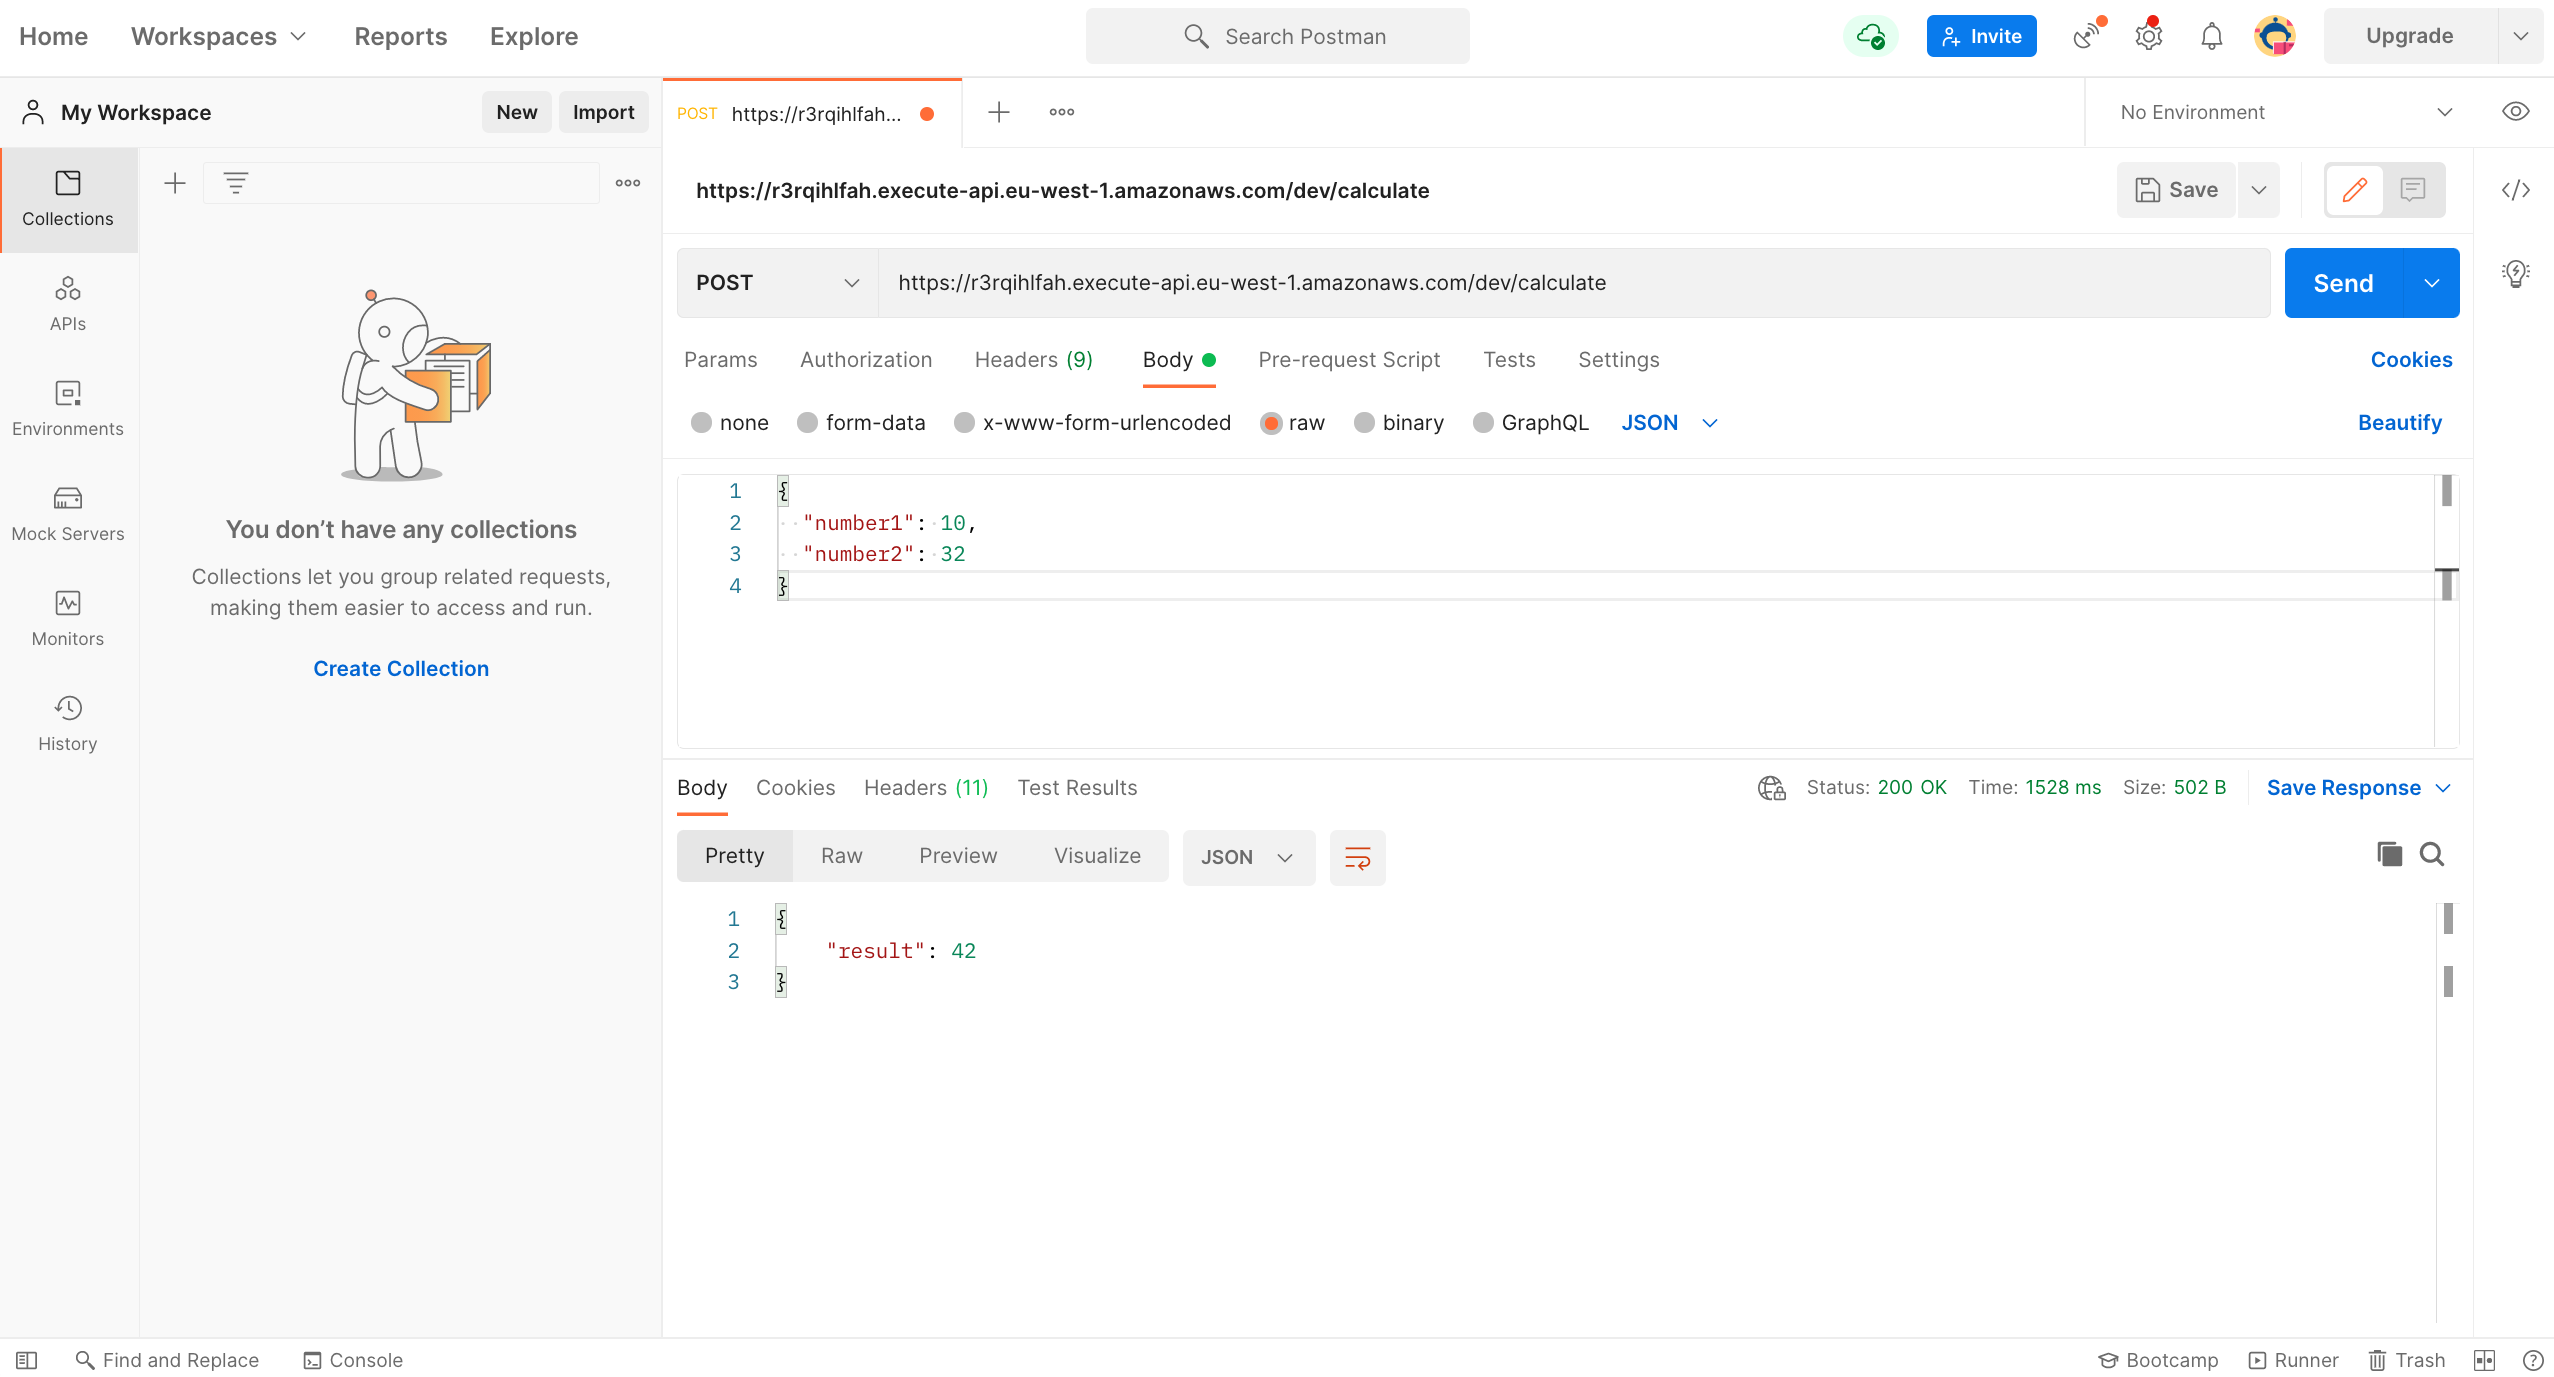

Send the request, and confirm that you get the result of the operation that you implemented above. If it does, you have successfully implemented a cloud calculator!

This concludes the course. We hope you found it interesting and let it be a stepping stone to more advanced applications!